##Data Exploration Projekt

In [ ]:
# Download and import of German Stopwords, execution only needed once
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [2]:
# All necessary imports
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from langdetect import detect
from ast import literal_eval
from fuzzywuzzy import fuzz

In [14]:
# Loading synonyms into a dataframe
kode = pd.read_excel("kode_data.xlsx", header=1)

# Keep one of the df commented
# Reading full dataset into dataframe
df = pd.read_csv('jobs.csv', encoding='UTF-8')

# Reading sample dataset into dataframe
# df = pd.read_excel("jobs_sample.xlsx")


In [15]:
# Preparing all neccessary components
r64 = range(64)
arr = np.zeros(shape=(8,8))
stop_words = set(stopwords.words('german'))
synonyms = [(syn, i)    for i in r64 
                        for syn in literal_eval(kode['syn'][i])]
                        

# Function to count frequency of words in column
def countall(col, lang:bool = False):
    wcnt = Counter()
    for row in col:
        if type(row) == str:
            try:
                if detect(row) == 'en' and lang == True:
                    tokens = word_tokenize(row, language="english")
                    words = [w   for w in tokens
                                    if not w.lower() in stop_words]
                    wcnt.update(words)
                elif lang == False:
                    tokens = word_tokenize(row)
                    words = [w   for w in tokens
                                    if not w.lower() in stop_words]
                    wcnt.update(words)
            except:
                pass 

    return wcnt

w = countall(df['title'])

print(w)

Counter({'(': 420534, ')': 420419, 'm/w/d': 310604, '/': 69561, 'w/m/d': 54144, 'Manager': 35381, '-': 29468, ',': 28153, 'Mitarbeiter': 21897, 'Bereich': 20568, '&': 18616, '*': 17683, 'Senior': 17388, 'Sachbearbeiter': 11029, 'IT': 10937, 'Schwerpunkt': 9923, 'Consultant': 9332, 'Sales': 9162, 'Engineer': 8961, '.': 8956, 'Junior': 8460, 'Management': 8355, 'm/f/d': 8035, 'Business': 7916, '–': 7740, 'Werkstudent': 7708, 'Marketing': 7669, 'Leiter': 7220, 'Teilzeit': 6996, 'Ausbildung': 6409, 'Service': 5951, 'Projektleiter': 5916, 'Teamleiter': 5800, 'Außendienst': 5530, 'Technischer': 5435, 'Account': 5395, 'Ingenieur': 5259, 'SAP': 5227, 'm/w/x': 5017, 'Software': 4928, 'Referent': 4802, 'Specialist': 4766, 'Vertrieb': 4718, 'Projektmanager': 4451, 'of': 4403, 'HR': 4245, 'Praktikant': 4187, 'Data': 4016, 'Praktikum': 3978, 'Assistenz': 3898, 'Controller': 3872, 'ab': 3825, 'Vertriebsmitarbeiter': 3754, 'Analyst': 3693, 'Servicetechniker': 3600, 'Support': 3565, 'Softwareentwickle

In [24]:
import csv

a_file = open("jobtitle_count3.csv", "w", encoding="utf8")

writer = csv.writer(a_file)
for key, value in w.most_common():
    writer.writerow([key, value])

a_file.close()

In [23]:

def synsyn(wcnt):
    dcnt = {i:0 for i in r64} # dict to count synonym value into
    for w in wcnt.keys():
        for syn in synonyms:
            ratio = fuzz.token_sort_ratio(w, syn[0])
            if ratio >= 81:
                dcnt[syn[1]] += wcnt[w]

    return dcnt

d = synsyn(w)
        

In [17]:
# start = time.time()
# d = countall()
# end = time.time()

# print(f"\nDuration: {np.round((end - start), 3)}s")


Duration: 41.09s


In [30]:
for i in r64:
    x,y = literal_eval(kode['coord'][i])
    arr[x-1][y-1] = d[i]

print(arr)

[[4.35500e+03 5.98370e+04 6.40730e+04 1.48650e+04 2.66740e+04 1.89700e+03
  1.02460e+04 5.65030e+04]
 [2.35120e+04 4.00910e+04 1.29620e+04 1.35916e+05 1.90100e+03 3.93030e+04
  5.40000e+01 3.63140e+04]
 [2.69560e+04 8.02770e+04 7.33950e+04 0.00000e+00 6.87000e+03 3.19720e+04
  1.75770e+04 2.93200e+04]
 [3.88900e+03 1.92000e+02 2.24500e+03 9.27000e+02 1.24000e+02 2.98000e+02
  1.31560e+04 3.74700e+03]
 [2.02300e+03 1.60000e+01 3.71000e+02 2.06200e+03 3.97600e+03 5.27400e+03
  5.53000e+02 2.64400e+04]
 [5.35460e+04 3.66920e+04 8.03900e+03 5.50200e+03 3.15490e+04 1.27000e+02
  1.55022e+05 2.78000e+02]
 [5.06650e+04 1.23600e+03 7.51000e+02 7.90000e+01 2.78300e+04 7.35000e+02
  2.89390e+05 6.56700e+03]
 [5.95100e+03 9.81800e+03 3.92000e+02 1.96210e+04 4.78000e+02 1.64000e+02
  1.81800e+03 6.42700e+03]]


In [33]:
import multiprocessing as mp

print("Number of processors:", mp.cpu_count())

Number of processors: 8


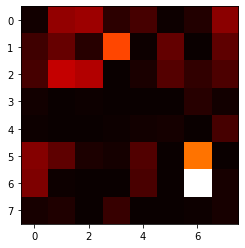

In [48]:
plt.imshow(arr, cmap='hot', interpolation='nearest')
plt.show()

<AxesSubplot:>

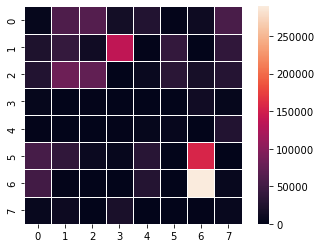

In [49]:
import seaborn as sns
sns.heatmap(arr, linewidths=1, linecolor='w', square=True)

<AxesSubplot:xlabel='freq'>

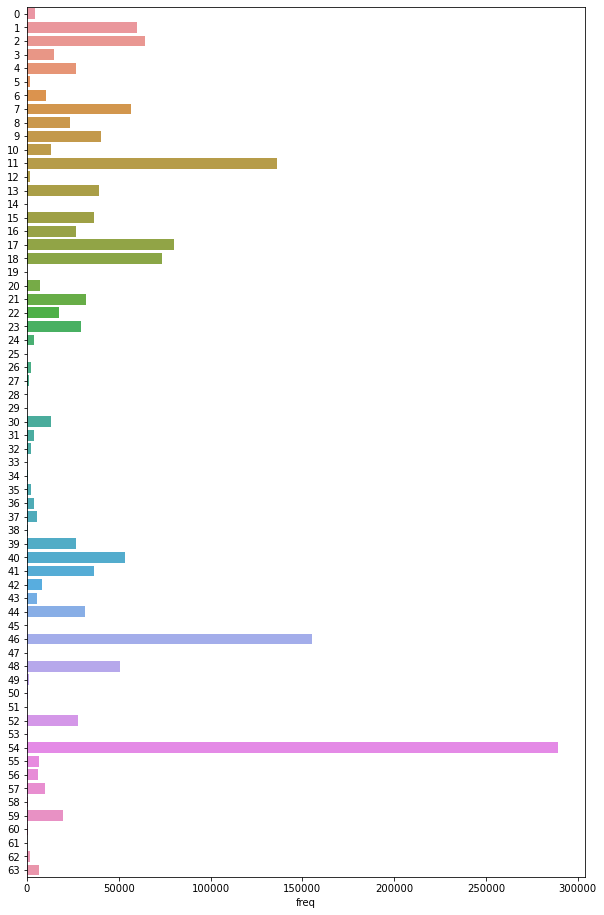

In [72]:
arrdf = pd.DataFrame(arr.flatten(), columns=['freq'])

plt.figure(figsize=(10,16))
sns.barplot(y=arrdf.index, x=arrdf.freq, orient='h')